#**CHAPTER 8. OREDER FLOW MECHANISM**
---

##0.REFERENCE

https://chatgpt.com/share/6989febb-51a4-8012-9bb4-fccdab1aba2b

##1.CONTEXT

**Introduction — Chapter 8: Order Flow (Microstructure Flow)**

This notebook builds a synthetic microstructure laboratory in which the central economic object is not a yield curve or a volatility surface, but a liquidity surface: an explicitly constructed mapping from trade intent into expected execution consequences. The market being modeled is the “short-horizon” environment where prices are shaped by order imbalance, depth, and information asymmetry, and where realized outcomes are dominated by the mechanics of getting in and out rather than by any claim of predictive skill. In this setting, price formation is inseparable from trading itself. The notebook therefore treats execution not as a secondary module, but as the primary channel through which market structure becomes economically meaningful.

The economic context is the canonical microstructure problem: a trader’s PnL is a joint product of (i) directional exposure to price changes and (ii) the microstructure tolls paid to acquire and unwind that exposure. In frictionless models, one can discuss signals, drift, or optimal control without confronting the fact that trading is itself a price-impacting activity. Real markets invert this abstraction. The book is not a passive reservoir of liquidity; it is a state variable that changes with stress, and its state determines both the cost of immediacy and the risk of being adversely selected. A strategy that appears “correct” directionally can lose money if it must express its view through expensive liquidity. Conversely, a strategy that appears “conservative” because it provides liquidity can be structurally fragile if it becomes a residual claimant on toxic flow.

The mechanism under study can be summarized with a deliberately blunt phrase: flow creates price, costs create reality. “Flow creates price” means that the midprice is not treated as an exogenous diffusion; it responds to signed imbalance, and the sensitivity of that response depends on depth. When depth is high, imbalance is absorbed with modest price movement. When depth is low, the same imbalance generates outsized returns. “Costs create reality” means that the relevant performance object is not a theoretical PnL before costs, but the net-of-execution equity process under explicitly modeled spread, impact, slippage, and adverse selection. The notebook is designed so that these cost channels can dominate outcomes in plausible regimes, not as a contrivance but as the educational point: in microstructure, friction is a first-order economic primitive.

A distinctive feature of this chapter is its tradable surface. In many macro chapters, the surface is a curve or tensor of prices that can be marked and traded. Here, the tradable surface is the liquidity grid: a matrix of expected impact measured in basis points as a function of trade size bucket and execution horizon bucket. This is “tradable” in the only sense that matters operationally: it maps portfolio adjustments into realized costs, and therefore directly determines the payoff to different execution postures. The surface is not a statistical artifact produced at the end of the backtest; it is generated each step as an equilibrium-like object implied by depth and toxicity. The agent observes a compact summary of this surface and must select an action under a constrained policy interface. In that sense, the liquidity surface plays the same structural role as a yield curve: it is a state-contingent object that reminds the practitioner that the environment is shaped, not given.

The state vector is synthetic but explicit. It includes signed order imbalance, a depth proxy, a toxicity proxy, and latent volatility. These variables evolve with regime persistence, meaning that the laboratory does not assume that microstructure conditions are independent from step to step. Instead, it emphasizes clustering: liquidity can remain abundant for long periods and then degrade rapidly; toxicity can rise and persist; volatility can cluster; and imbalance can be serially correlated. This matters because most execution failures are not single-step accidents. They are episodes in which costs become convex and the trader continues to transact as if the world were still linear. The notebook makes that convexity visible by tying impact to both size and illiquidity.

Execution realism in this notebook is not a high-frequency market simulator; it is a pedagogical representation of the cost channels that practitioners confront. The model includes half-spread costs that widen with toxicity, a surface-implied impact component derived from the liquidity grid, an additional slippage proxy that grows with trade size and illiquidity, and an adverse selection penalty that specifically targets passive execution. This last term is central. The intent is to encode the idea that providing liquidity is not inherently conservative: when informed trading is present, passive orders can be “picked off,” meaning fills arrive precisely when the next price move is adverse. In the laboratory, this is implemented as a toxicity-dependent penalty that increases with imbalance magnitude, capturing the intuition that “when flow is one-sided and toxic, being passive is a short option on information.”

The constrained action space reinforces mechanism-first thinking. The agent cannot invent a continuous schedule, tweak parameters, or design a bespoke execution algorithm. It must choose among three actions: PASSIVE_PROVIDE, AGGRESSIVE_TAKE, or FLAT. Each action maps to a target inventory posture and an execution style. Passive provision leans against flow, expressing the hypothesis that short-term price pressure can mean-revert and that spread capture can compensate for providing liquidity. Aggressive taking aligns with flow, expressing the hypothesis that imbalance represents information or momentum that should be followed, while accepting the cost of immediacy. Flat is a valid and often optimal action in microstructure, reflecting the professional recognition that in certain states the right trade is to refuse to trade. By restricting the agent to these actions, the notebook forces a clean conversation: the economic question is not “what is the optimal model,” but “in which regimes is liquidity provision compensated, and in which regimes is it punished?”

The agentic structure is deliberately auditable. A deterministic baseline policy provides a transparent mapping from state summaries to actions. An optional LLM policy, using GPT-4o-mini, is inserted as a bounded decision wrapper that is allowed to select only from the predefined action set and must return machine-parseable JSON consisting of an action and a short rationale. The LLM has no access to code, parameters, or hidden state beyond what is presented in the compact context. This is not an attempt to “outperform” the baseline. It is a mechanism for studying how a language model behaves when placed inside a constrained execution environment where the correct behavior is often to do less, not more, and where the cost structure punishes impulsive churn.

Closed-loop backtesting is essential to the learning objective. In this notebook, the policy’s actions change inventory; inventory determines exposure to subsequent midprice changes; and the act of trading incurs costs that accumulate into the equity curve. This feedback loop forces the reader to confront path dependence. If the agent transacts heavily in a toxic, thin market, the equity curve can degrade even if the market later returns to benign conditions. Conversely, if the agent stays flat during toxic episodes, it may preserve equity but forego any opportunity to benefit from flow-driven moves. The notebook is designed to make such tradeoffs explicit and quantifiable through diagnostics: equity curve, state and regime traces, cumulative costs, action counts, and a final interpretive table that ties mechanism to observed behavior and fragility modes.

Mechanism-first thinking is not a slogan here; it is the organizing principle for how the notebook is read. The correct way to interpret outputs is to ask: what is being compensated in benign regimes, what is being charged in stress regimes, and how does the liquidity surface encode that transformation? In the laboratory, passive provision may look attractive when spread capture and mild mean reversion dominate. But as toxicity rises, the same behavior may become a systematic loss mechanism driven by adverse selection. Aggressive taking may look appealing when imbalance is informative and depth is sufficient. But as depth collapses, impact becomes convex and the cost of immediacy can dominate any informational edge. The notebook’s main contribution is that these effects are not asserted; they are generated as visible objects in the simulation, and they are expressed through a constrained policy interface that allows the reader to experiment without changing the underlying economic scaffolding.

Finally, it is important to state what this notebook is not. It does not forecast markets. It does not claim realism at the level of a limit order book simulator. It does not recommend a strategy. It is a controlled environment for cultivating professional intuition about microstructure: that liquidity is a state variable, that execution is the bridge between theory and realized outcomes, and that many “alpha discussions” are incomplete unless they are grounded in the cost geometry implied by the tradable liquidity surface. The goal is to build a mental model that transfers to real practice: when conditions degrade, the first-order question becomes not “what do I believe,” but “what does it cost to express that belief, and what hidden risks am I selling by providing or demanding liquidity?”


##2.LIBRARIES AND ENVIRONMENT

In [1]:
# CELL 2 (Code) — Installs / Imports / Seed / Run Config / Utilities / Logging

!pip -q install --upgrade openai

import os, json, time, math, hashlib, random
from dataclasses import dataclass
from typing import Dict, Any, Tuple, Optional, List

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import userdata
from openai import OpenAI

# ----------------------------
# Reproducibility + auditability
# ----------------------------
def stable_hash(s: str) -> str:
    return hashlib.sha256(s.encode("utf-8")).hexdigest()[:16]

def now_ts() -> str:
    return time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())

def clamp(x: float, lo: float, hi: float) -> float:
    return float(max(lo, min(hi, x)))

# ----------------------------
# Run config (chapter-specific knobs live here)
# ----------------------------
run_config = {
    "chapter_id": 8,
    "chapter_name": "Order Flow — Microstructure Flow",
    "seed": 7,
    "T": 100,
    "dt": 1.0,

    # Regime here is "toxicity regime" (low / mid / high), Markov-driven.
    "regimes": {
        "names": ["benign", "mixed", "toxic"],
        "markov_P": [
            [0.965, 0.030, 0.005],
            [0.040, 0.930, 0.030],
            [0.010, 0.070, 0.920],
        ],
        "notes": "Regime drives toxicity, depth, spread, and impact convexity."
    },

    "market_params": {
        "mechanism": "midprice responds to signed imbalance scaled by depth; toxicity increases adverse selection and widens spreads",
        "mid0": 100.0,
        "base_vol": 0.0020,         # per-step latent vol scale
        "vol_persist": 0.975,       # latent vol clustering
        "imbalance_persist": 0.85,  # flow clustering
        "flow_to_price_k": 0.020,   # impact of imbalance on returns (scaled by depth)
        "depth_mean": 1.0,
    },

    # Tradable surface: size_bucket x horizon_bucket expected impact (bps)
    "surface_params": {
        "surface_type": "matrix",
        "axes": {
            "size_buckets": [0.25, 0.50, 1.00, 1.50],   # trade size in "inventory units"
            "horizon_buckets": [1, 3, 8, 20],           # execution horizon proxy (steps)
        },
        "construction": "expected impact increases with size, toxicity, and inverse depth; horizon mitigates immediate impact"
    },

    "execution_params": {
        "half_spread_bps_base": 1.0,    # baseline half-spread (bps)
        "half_spread_bps_toxic_add": 5.0,  # extra half-spread at high toxicity
        "fee_bps": 0.2,                 # proportional fee-like cost (bps) on notional
        "slippage_lambda": 0.10,        # convex impact coefficient (scales with illiquidity)
        "adverse_selection_lambda": 0.25,  # passive gets picked off when toxic
        "maker_rebate_bps": 0.1,        # passive "rebate" (bps), can be overwhelmed by AS
    },

    "risk_params": {
        "max_leverage": 2.0,    # leverage cap on |inventory| * mid / equity
        "pos_limit": 2.0,       # max absolute inventory in units
        "max_dd_stop": 0.20     # hard stop: if drawdown exceeds, force FLAT
    },

    "policy_params": {
        "enable_llm": True,
        "llm_model": "gpt-4o-mini",
        "llm_temperature": 0.0,
        "fallback_to_baseline_on_error": True,
        "llm_max_rationale_chars": 240
    },

    "telemetry": {
        "print_every": 50,      # loop telemetry cadence
        "time_budget_warn_s": 0.75  # warn if a single step takes too long
    }
}

# ----------------------------
# Seed everything
# ----------------------------
seed = int(run_config["seed"])
random.seed(seed)
np.random.seed(seed)

# ----------------------------
# Lightweight run manifest
# ----------------------------
payload_hash = stable_hash(json.dumps(run_config, sort_keys=True))
run_manifest = {
    "run_id": f"ch{run_config['chapter_id']}_{payload_hash}_{int(time.time())}",
    "timestamp_utc": now_ts(),
    "payload_hash": payload_hash,
    "python_version": f"{os.sys.version_info.major}.{os.sys.version_info.minor}.{os.sys.version_info.micro}",
}

print("RUN MANIFEST")
print(json.dumps(run_manifest, indent=2))

# ----------------------------
# Logging containers
# ----------------------------
logs: List[Dict[str, Any]] = []
telemetry = {
    "steps": 0,
    "llm_calls": 0,
    "llm_valid": 0,
    "llm_fallbacks": 0,
    "llm_latency_ms_sum": 0.0,
    "step_time_ms_max": 0.0,
}


RUN MANIFEST
{
  "run_id": "ch8_66ac61f7776bc6ec_1770648257",
  "timestamp_utc": "2026-02-09 14:44:17",
  "payload_hash": "66ac61f7776bc6ec",
  "python_version": "3.12.12"
}


##3.REGIME PROCESS AND STATE EVOLUTION

###3.1.OVERVIEW

**Cell 3 — Regime Process and State Evolution**

Cell 3 constructs the endogenous “weather” of the microstructure world: a regime process and a set of state variables whose evolution encodes persistence, clustering, and abrupt deterioration. The key purpose is to ensure that liquidity conditions are not i.i.d. noise around a constant mean, because real execution risk is episodic. The cell therefore defines a Markov chain over a small set of regimes—typically benign, mixed, and toxic—and uses the regime path to modulate the behavior of depth, toxicity, latent volatility, and imbalance. This is not an aesthetic choice; it is a mechanism choice. If liquidity never deteriorates persistently, then many execution pathologies cannot be demonstrated, and the educational content collapses into a stylized friction term.

The market mechanism being modeled is the coupling between informational stress and liquidity stress. Toxicity is treated as a state variable that mean-reverts around a regime-conditioned center, reflecting the idea that adverse selection risk rises when informed flow dominates. Depth is modeled as a multiplicative factor that is higher in benign regimes and lower in toxic regimes, reflecting the empirical observation that liquidity evaporates when it is needed most. Latent volatility clusters, reflecting the fact that microstructure stress is often accompanied by elevated volatility and that volatility itself changes the economics of liquidity provision. Imbalance is persistent, reflecting flow clustering and order splitting: when markets are one-sided, they are often one-sided for a while.

This cell’s features are constructed to be interpretable. Toxicity lives in a bounded interval, depth is positive and variable, imbalance is signed and bounded, and latent volatility is positive with persistence. The transitions are explicit rather than learned. That explicitness matters because the notebook is a laboratory: it is not attempting to fit microstructure to data but to expose causal channels. The agent’s later decisions will be functions of these state variables, and the reader should be able to reason mechanistically about how a change in regime alters costs and payoffs.

The environment logic that depends on Cell 3 is the entire backtest’s feasibility. If toxic regimes persist, then the agent may be forced into extended FLAT postures to avoid paying convex costs. If imbalance clusters, aggressive taking can appear attractive, but only if depth is sufficient. If depth collapses, passive provision becomes more dangerous because fills arrive under higher adverse selection. These are the kinds of conditional statements that define professional execution intuition, and Cell 3 is where they are made possible.

The learning objective is to internalize that “microstructure conditions are stateful.” Execution is not a stationary penalty. It is an evolving environment with regimes that reshape the set of economically coherent actions. By explicitly constructing that evolution, Cell 3 sets the stage for the later demonstration that the same action can be compensated in one regime and punished in another, even when the “signal” looks superficially similar.


###3.2.CODE AND IMPLEMENTATION

In [2]:
# CELL 3 (Code) — Regime Process + State Evolution (explicit Markov + transitions)

@dataclass
class MicroState:
    t: int
    regime_id: int
    regime: str
    mid: float
    latent_vol: float
    imbalance: float
    depth: float
    toxicity: float

def sample_markov_path(T: int, P: np.ndarray, start: int = 0) -> np.ndarray:
    states = np.zeros(T, dtype=int)
    s = start
    for t in range(T):
        states[t] = s
        s = int(np.random.choice(len(P), p=P[s]))
    return states

reg_names = run_config["regimes"]["names"]
P = np.array(run_config["regimes"]["markov_P"], dtype=float)

T = int(run_config["T"])
reg_path = sample_markov_path(T, P, start=0)

mp = run_config["market_params"]

# Regime-conditioned knobs (benign → toxic)
reg_toxic_center = np.array([0.15, 0.45, 0.85])
reg_depth_mult   = np.array([1.30, 1.00, 0.70])
reg_vol_mult     = np.array([0.90, 1.10, 1.45])

# Initialize latent processes
mid = float(mp["mid0"])
latent_vol = float(mp["base_vol"])
imb = 0.0

states: List[MicroState] = []

for t in range(T):
    r = int(reg_path[t])
    regime = reg_names[r]

    # Toxicity mean-reverts around regime center with idiosyncratic shocks
    tox = clamp(
        reg_toxic_center[r] + 0.12*np.random.randn(),
        0.0, 1.0
    )

    # Depth is higher in benign regimes, lower in toxic; add lognormal noise
    depth = float(mp["depth_mean"] * reg_depth_mult[r] * np.exp(0.15*np.random.randn()))
    depth = clamp(depth, 0.15, 3.0)

    # Latent vol clusters, higher in toxic regimes
    latent_vol = clamp(
        mp["vol_persist"] * latent_vol + (1 - mp["vol_persist"]) * mp["base_vol"] * reg_vol_mult[r] * (1.0 + 0.6*tox)
        + 0.15 * mp["base_vol"] * np.random.randn(),
        1e-5, 0.02
    )

    # Imbalance clusters (signed), regime affects variance via tox and vol
    shock_scale = 0.35 + 0.65*tox
    imb = clamp(
        mp["imbalance_persist"] * imb + (1 - mp["imbalance_persist"]) * (shock_scale * np.random.randn()),
        -1.0, 1.0
    )

    # Mid update in Cell 4 (depends on surface construction and execution conventions)
    states.append(MicroState(t=t, regime_id=r, regime=regime, mid=mid,
                             latent_vol=latent_vol, imbalance=imb,
                             depth=depth, toxicity=tox))

print("State path built:", len(states), "steps")
print("Regime counts:", dict(pd.Series(reg_path).value_counts().sort_index().rename(index=dict(enumerate(reg_names)))))


State path built: 100 steps
Regime counts: {'benign': np.int64(85), 'mixed': np.int64(15)}


##4.MARKET SIMULATOR

###4.1.OVERVIEW

**Cell 4 — Market Simulator and Tradable Surface Construction**

Cell 4 translates the abstract state variables into two observable objects that define the trading laboratory: a midprice path and a liquidity surface. Its purpose is to formalize the claim that flow creates price and to make the costs of trading legible as a surface that can be inspected, summarized, and acted upon. In microstructure terms, this cell is where the synthetic market becomes “tradable,” not because it produces a price series alone, but because it produces a state-contingent mapping from trade size and horizon into expected impact measured in basis points.

The price formation mechanism is intentionally simple but economically meaningful. Midprice returns are driven by a flow term proportional to signed imbalance and scaled inversely by depth, plus a noise term proportional to latent volatility. This encodes a common microstructure intuition: for a given imbalance, the price moves more in a thin book than in a deep book. The scaling is not meant to replicate a specific exchange model. It is meant to establish a causal channel that can be inspected: when depth is low, flow has greater price impact, both mechanically and through the interpretation that imbalance becomes more informative in stressed markets.

The second object—central to the chapter—is the liquidity grid. The grid is constructed as a matrix over size buckets and horizon buckets. Its entries are expected impact in bps, increasing with trade size and toxicity, and increasing when depth is low. A horizon dimension mitigates immediate impact, capturing the basic idea that slower execution can reduce price concession per unit traded. This is the chapter’s analog to a yield curve or vol surface: it is an observable, state-contingent object that the agent can summarize and use to decide how to trade.

The structural role of this cell is to make execution endogenous to market state rather than a constant parameter. The grid steepens in toxic regimes, meaning that the same trade is more expensive when the market is stressed. This is precisely what practitioners face: liquidity is abundant when it is least valuable and scarce when it is most valuable. By encoding that scarcity into a surface, the notebook gives students a concrete object to interpret. The “surface interpretation” is therefore operational: when the grid is steep and convex, aggressive actions become expensive; when the grid is flatter, trading becomes less punitive and policy flexibility increases.

This cell also supports later diagnostics. Because the grid is built each step, one can aggregate or summarize it to monitor the evolving cost geometry. The policy layer does not see the full matrix; it sees compact summaries such as min/median/max impact, which mirrors professional constraints: traders rarely have perfect microstructure knowledge, but they have enough to infer whether conditions are benign or hostile.

The learning objective is to understand that in microstructure, the relevant “market surface” is often a cost surface. Prices tell you what the asset is worth at the margin; the liquidity surface tells you what it costs to move from one inventory state to another. A mechanism-first practitioner must read both.


###4.2.CODE AND IMPLEMENTATION

In [3]:
# CELL 4 (Code) — Market Simulator: prices + tradable surface each t (liquidity grid)

sp = run_config["surface_params"]
size_buckets = np.array(sp["axes"]["size_buckets"], dtype=float)
horizon_buckets = np.array(sp["axes"]["horizon_buckets"], dtype=float)

def build_liquidity_grid(depth: float, toxicity: float, latent_vol: float) -> np.ndarray:
    """
    Returns impact grid in bps: impact_bps[size_i, horizon_j].
    Mechanism: impact ↑ with size and toxicity; impact ↑ when depth ↓; longer horizon mitigates.
    """
    # Illiquidity proxy: (toxicity + vol) / depth (bounded)
    illiq = (0.7*toxicity + 0.3*min(1.0, latent_vol / (mp["base_vol"] + 1e-9))) / (depth + 1e-9)
    illiq = clamp(illiq, 0.02, 3.0)

    # Convexity: impact grows superlinearly with size under illiquidity
    alpha = 1.10 + 0.55*toxicity     # size convexity exponent
    base = 3.0 * illiq               # baseline bps per unit size (scaled)
    grid = np.zeros((len(size_buckets), len(horizon_buckets)), dtype=float)

    for i, q in enumerate(size_buckets):
        for j, h in enumerate(horizon_buckets):
            horizon_mitig = 1.0 / math.sqrt(h)  # longer horizon reduces instantaneous impact
            grid[i, j] = base * (q**alpha) * horizon_mitig

    return grid

# Price path generation consistent with "flow creates price"
# We evolve the mid using imbalance scaled by depth + latent volatility noise.
mid_path = np.zeros(T, dtype=float)
liq_grids = np.zeros((T, len(size_buckets), len(horizon_buckets)), dtype=float)

mid = float(mp["mid0"])
for t in range(T):
    st = states[t]

    # Tradable surface (liquidity grid) is observable at t
    grid = build_liquidity_grid(st.depth, st.toxicity, st.latent_vol)
    liq_grids[t] = grid

    # Flow-driven return: signed imbalance, amplified when depth is thin
    flow_term = (mp["flow_to_price_k"] * st.imbalance) / (st.depth + 1e-9)

    # Noise term: clustered volatility, scaled to returns
    noise_term = st.latent_vol * np.random.randn()

    ret = flow_term + noise_term
    mid = max(1e-6, mid * (1.0 + ret))

    mid_path[t] = mid
    # write back to state for consistency
    states[t].mid = float(mid)

print("Mid generated. Range:", float(mid_path.min()), "→", float(mid_path.max()))


Mid generated. Range: 98.97745436160538 → 105.43245649884615


##5.EXECUTION AND PORTFOLIO ENVIRONMENT

###5.1.OVERVIEW

**Cell 5 — Execution and Portfolio Environment**

Cell 5 is where the laboratory becomes economically honest. It defines how inventory changes are executed, how costs are charged, how equity is updated, and how constraints are enforced. The purpose is to prevent the common modeling failure in which strategy logic is evaluated under frictionless assumptions and costs are added later as a small perturbation. In microstructure, costs are not a perturbation; they are the dominant channel through which market structure affects realized outcomes. This cell therefore places spread, impact, slippage, and adverse selection at the center of the environment.

The execution model decomposes costs into interpretable components. Half-spread costs widen with toxicity, reflecting that stressed markets quote wider spreads and that immediacy is more expensive. Impact is read from the liquidity surface, tying execution cost directly to the tradable grid constructed in Cell 4. A slippage proxy adds convexity by increasing with trade size and an illiquidity measure that depends on toxicity, volatility, and inverse depth. Most importantly, passive execution incurs an adverse selection penalty that rises sharply with toxicity and with the magnitude of imbalance. This encodes the critical idea that passive liquidity provision is not free money: when informed flow is present, passive fills can systematically precede adverse price moves.

The portfolio environment is intentionally minimal: a single risky asset with inventory in units, cash, and mark-to-market equity. This minimalism is a feature. It ensures that any observed behavior can be attributed to microstructure and execution rather than to multi-asset interactions. The environment computes leverage as a function of inventory value relative to equity, and it enforces position limits. A drawdown stop imposes a survival constraint: if equity falls sufficiently below its peak, the environment forces the agent into a stopped state that maps to flat behavior. This is not “risk management theater.” It reflects the institutional reality that microstructure stress episodes often coincide with risk limit breaches, and the strategy that ignores this coupling is not implementable.

The cell’s structural role is to convert action choices into realized consequences. An aggressive trade may align with flow and capture a move, but it pays spread and impact. A passive trade may avoid crossing the spread and may even benefit from rebates, but it sells optionality against adverse selection. These are distinct economic postures with distinct failure modes, and the environment ensures that those failure modes can dominate the equity curve in certain regimes. By accounting costs explicitly in cash and marking equity continuously, the notebook makes cost accumulation visible, enabling diagnostics that separate “market PnL” from “execution drag.”

The learning objective is to cultivate a professional instinct: always ask not just whether a position is directionally correct, but whether the path taken to acquire and unwind that position is economically viable given the prevailing liquidity surface. In this laboratory, that viability is state-dependent, and Cell 5 is where that dependency is enforced.


###5.2.CODE AND IMPLEMENTATION

In [4]:
# CELL 5 (Code) — Execution + Portfolio Environment (positions, leverage, costs, PnL, constraints)

@dataclass
class Portfolio:
    cash: float
    inv: float   # inventory in units (positive = long)
    equity: float
    peak_equity: float
    stopped: bool

def compute_leverage(inv: float, mid: float, equity: float) -> float:
    if equity <= 1e-12:
        return float("inf")
    return abs(inv * mid) / equity

ep = run_config["execution_params"]
rp = run_config["risk_params"]

def half_spread_bps(toxicity: float) -> float:
    return ep["half_spread_bps_base"] + ep["half_spread_bps_toxic_add"] * toxicity

def notional(inv_delta: float, mid: float) -> float:
    return abs(inv_delta) * mid

def exec_trade(
    st: MicroState,
    grid_bps: np.ndarray,
    inv_delta: float,
    is_passive: bool,
    size_bucket_idx: int,
    horizon_bucket_idx: int
) -> Dict[str, float]:
    """
    Executes inventory change inv_delta at mid with microstructure costs.
    - Passive: earns (approx) half-spread and maker rebate, but pays adverse selection under toxicity.
    - Aggressive: pays half-spread + impact + fees.
    Impact is read off the liquidity grid based on size/horizon buckets.
    """
    mid = st.mid
    tox = st.toxicity
    d = st.depth

    hs_bps = half_spread_bps(tox)
    fee_bps = ep["fee_bps"]

    # Surface-implied impact (bps) for the chosen size/horizon bucket
    impact_bps = float(grid_bps[size_bucket_idx, horizon_bucket_idx])

    # Additional convex slippage proxy: |q| * lambda * illiquidity
    illiq = (0.7*tox + 0.3*min(1.0, st.latent_vol/(mp["base_vol"]+1e-9))) / (d + 1e-9)
    slip_bps = ep["slippage_lambda"] * abs(inv_delta) * (1.0 + 2.0*illiq)

    # Adverse selection penalty for passive: increases with toxicity and imbalance magnitude
    # Intuition: when toxic, passive gets filled before adverse move (picked off).
    as_bps = ep["adverse_selection_lambda"] * (tox**1.3) * (0.5 + 0.5*abs(st.imbalance)) * 10.0  # scaled to bps

    maker_rebate_bps = ep["maker_rebate_bps"]

    # Price improvement / deterioration in bps relative to mid
    if inv_delta == 0.0:
        px = mid
        total_cost = 0.0
        return {"exec_px": px, "hs_bps": 0.0, "impact_bps": 0.0, "slip_bps": 0.0, "as_bps": 0.0,
                "fee_bps": 0.0, "rebate_bps": 0.0, "total_cost": 0.0}

    side = np.sign(inv_delta)  # +1 buy, -1 sell

    if is_passive:
        # Passive: you tend to trade at a slightly better price (earn spread), but AS can reverse it.
        # Effective bps against you: -hs (benefit) + as (penalty) + small residual impact/slip on fill
        eff_bps = (-hs_bps) + as_bps + 0.35*impact_bps + 0.35*slip_bps - maker_rebate_bps
    else:
        # Aggressive: pay spread + impact + slip + fees
        eff_bps = (hs_bps) + impact_bps + slip_bps + fee_bps

    # Convert bps to price slippage; buys pay up, sells receive less
    px = mid * (1.0 + side * (eff_bps / 1e4))

    total_cost = notional(inv_delta, mid) * abs(eff_bps) / 1e4  # always positive accounting

    return {
        "exec_px": float(px),
        "hs_bps": float(hs_bps),
        "impact_bps": float(impact_bps),
        "slip_bps": float(slip_bps),
        "as_bps": float(as_bps if is_passive else 0.0),
        "fee_bps": float(fee_bps if not is_passive else 0.0),
        "rebate_bps": float(maker_rebate_bps if is_passive else 0.0),
        "total_cost": float(total_cost),
    }

def apply_risk_constraints(pf: Portfolio, st: MicroState, target_inv: float) -> float:
    # Position bounds
    target_inv = clamp(target_inv, -rp["pos_limit"], rp["pos_limit"])

    # Leverage constraint (approx: enforce on target)
    lev = compute_leverage(target_inv, st.mid, pf.equity)
    if lev > rp["max_leverage"]:
        # scale down inventory to meet leverage
        if abs(target_inv) > 1e-12:
            target_inv = np.sign(target_inv) * (rp["max_leverage"] * pf.equity / st.mid)

    target_inv = clamp(target_inv, -rp["pos_limit"], rp["pos_limit"])
    return float(target_inv)

def mark_to_market_equity(pf: Portfolio, mid: float) -> float:
    return pf.cash + pf.inv * mid

# Initialize portfolio
pf = Portfolio(cash=1.0, inv=0.0, equity=1.0, peak_equity=1.0, stopped=False)

print("Portfolio initialized:", pf)


Portfolio initialized: Portfolio(cash=1.0, inv=0.0, equity=1.0, peak_equity=1.0, stopped=False)


##6.ACTION SPACE

###6.1.OVERVIEW

**Cell 6 — Action Space and Action-to-Trade Mapping**

Cell 6 defines the constrained control interface that makes the notebook an agentic laboratory rather than a free-form research sandbox. Its purpose is to impose discipline: the agent cannot invent new actions, adjust continuous parameters, or manipulate code. Instead, it must choose among a small set of economically interpretable execution postures. This constraint is central to mechanism-first pedagogy because it forces the reader to reason in terms of structural choices—provide liquidity, take liquidity, or stay out—rather than in terms of overfit policy complexity.

The action set is deliberately sparse: PASSIVE_PROVIDE, AGGRESSIVE_TAKE, and FLAT. Each action maps to a target inventory and an execution style, which together determine the trade size, the cost channels triggered, and the exposure to subsequent price moves. PASSIVE_PROVIDE leans against the sign of imbalance, reflecting a liquidity-provision posture that expects partial mean reversion of short-horizon pressure and seeks to earn spread or rebates. AGGRESSIVE_TAKE aligns with imbalance, reflecting the belief that flow contains information or that pressure will continue, and accepts the cost of immediacy. FLAT targets zero inventory, reflecting the professional recognition that in hostile microstructure states the optimal trade is often not to trade.

The mapping also chooses size and horizon buckets that reference the liquidity surface. This ties actions directly to the tradable grid: a passive posture typically uses a more patient horizon bucket and moderate size; an aggressive posture uses a shorter horizon bucket and larger size, increasing exposure to convex impact. These choices are not meant to be the optimal schedule; they are meant to create consistent, interpretable differences between postures so the resulting diagnostics can be read causally. By baking these mappings into code, the notebook ensures that a chosen action corresponds to a coherent economic expression rather than an arbitrary set of trade primitives.

The environment logic is shaped by this cell because the rest of the notebook assumes that the action space is complete and exclusive. Baseline rules, LLM decisions, and logging all depend on the fact that actions are enumerated and that their semantics are stable across runs. This stability is crucial for auditability: when a log record says the agent chose PASSIVE_PROVIDE, the reader should know what that means in terms of inventory adjustment and cost channels, without needing to inspect changing code.

The learning objective is to make students fluent in the tradeoff between immediacy and selection. PASSIVE_PROVIDE is not “safer” than AGGRESSIVE_TAKE; it is safer only in certain regimes, and it becomes fragile when toxicity rises. AGGRESSIVE_TAKE is not “reckless” by definition; it can be rational when depth is adequate and flow is informative. FLAT is not “doing nothing”; it is an execution-aware decision that preserves option value when the cost surface is steep. Cell 6 operationalizes these distinctions so they can be experienced empirically in the backtest rather than asserted verbally.


###6.2.CODE AND IMPLEMENTATION

In [5]:
# CELL 6 (Code) — Action Space + action→trade mapping (only allowed actions)

ACTIONS = ["PASSIVE_PROVIDE", "AGGRESSIVE_TAKE", "FLAT"]

# Map action to a target inventory and execution style.
# The key microstructure idea: inventory is the "position" in a single risky asset,
# but the action is fundamentally an execution posture under a liquidity regime.

def action_to_target(
    action: str,
    st: MicroState,
    pf: Portfolio
) -> Tuple[float, bool, int, int]:
    """
    Returns (target_inv, is_passive, size_bucket_idx, horizon_bucket_idx).
    - PASSIVE_PROVIDE: lean against imbalance (provide liquidity), moderate size, longer horizon
    - AGGRESSIVE_TAKE: go with imbalance (take liquidity), larger size, short horizon
    - FLAT: target inventory 0, no trade
    """
    if action not in ACTIONS:
        raise ValueError("Unknown action")

    # Convert observable state into a compact "desired direction"
    dir_flow = np.sign(st.imbalance)  # +1 buy pressure, -1 sell pressure
    tox = st.toxicity

    if action == "FLAT":
        return 0.0, True, 0, -1  # horizon idx unused

    if action == "PASSIVE_PROVIDE":
        # Provide liquidity: fade the flow, but reduce aggressiveness when toxicity is high.
        # In toxic regimes, passive can be dangerous due to adverse selection → smaller target.
        base = 0.8 * (1.0 - 0.7*tox)
        target = -dir_flow * base
        size_idx = 1  # moderate size bucket
        horizon_idx = 2  # longer horizon bucket
        return float(target), True, size_idx, horizon_idx

    if action == "AGGRESSIVE_TAKE":
        # Take liquidity: follow flow, but size down in high toxicity / low depth due to impact convexity.
        depth_pen = 1.0 / math.sqrt(st.depth + 1e-9)
        base = 1.2 * (1.0 - 0.35*tox) * (1.0 / (1.0 + 0.6*depth_pen))
        target = dir_flow * base
        size_idx = 2  # larger size bucket
        horizon_idx = 0  # short horizon bucket
        return float(target), False, size_idx, horizon_idx

    raise RuntimeError("Unreachable")

print("Allowed actions:", ACTIONS)


Allowed actions: ['PASSIVE_PROVIDE', 'AGGRESSIVE_TAKE', 'FLAT']


##7.BASELINE

###7.1.OVERVIEW

**Cell 7 — Baseline Rule Policy**

Cell 7 provides the deterministic decision rule that anchors interpretability. Its purpose is not to be clever. It is to be auditable, to express explicit hypotheses about microstructure, and to create a benchmark against which the behavior of any optional LLM policy can be understood. In a mechanism-first notebook, the baseline policy is conceptually important because it encodes a simple mapping from state variables and surface summaries into economically meaningful actions. That mapping, when combined with the execution environment, produces outcomes that can be traced step by step.

The baseline rule typically implements a hierarchy of concerns. The first concern is survival and feasibility: if drawdown constraints are triggered, or if liquidity conditions are severely impaired, the baseline chooses FLAT. This is not a “conservative” aesthetic. It is an acknowledgement that in microstructure, the set of feasible trades can shrink dramatically when depth collapses and toxicity rises. In such states, both passive and aggressive postures can be punished: passive by adverse selection, aggressive by convex impact. The baseline therefore treats “do not trade” as the default under severe illiquidity.

The second concern is the strength of flow. When imbalance is weak, the baseline tends to avoid trading to prevent churn. This operationalizes an execution truth: if the expected gross edge is small, microstructure tolls will dominate. When imbalance is moderate and liquidity is acceptable, the baseline often chooses PASSIVE_PROVIDE, expressing the hypothesis that spread capture and mild mean reversion can compensate liquidity provision in benign states. When imbalance is strong and liquidity is still acceptable, the baseline may choose AGGRESSIVE_TAKE, expressing the hypothesis that one-sided pressure can persist and that paying the spread can be justified when depth is sufficient and toxicity is not extreme.

The policy behavior is intentionally threshold-based. Thresholds are pedagogically useful because they create discrete regime-like behavior from continuous state variables: small changes in toxicity can flip the policy from passive provision to flat, making the student see how microstructure state can abruptly alter optimal execution posture. The policy also respects the constrained action interface, ensuring that decision-making remains within the three allowed actions and that the mapping to trades remains stable and interpretable.

The learning objective is twofold. First, it gives students a transparent rule set they can reason about: they can ask whether the threshold logic matches their own intuition and then test that intuition by observing outcomes and cost decomposition. Second, it provides a robust fallback for the LLM policy: if the LLM produces invalid JSON or an out-of-set action, the environment can revert to a known-safe baseline. This protects auditability and ensures the closed-loop backtest remains well-defined.

In short, Cell 7 is the notebook’s “control group.” It makes the experiment scientific: when you vary regime persistence, impact convexity, or adverse selection intensity, you can interpret changes in outcomes as changes in the mechanism, not as artifacts of an opaque policy.


###7.2.CODE AND IMPLEMENTATION

In [6]:
# CELL 7 (Code) — Baseline rule policy (deterministic, auditable)

def baseline_policy(st: MicroState, pf: Portfolio) -> Tuple[str, str]:
    """
    Deterministic rule:
    - If toxicity high OR depth very low → prefer FLAT unless imbalance is extreme.
    - If benign liquidity and low toxicity:
        * if imbalance moderate: PASSIVE_PROVIDE (earn spread / mean-revert flow)
        * if imbalance large and toxicity not too high: AGGRESSIVE_TAKE
    Rationale is short and mechanism/execution-aware.
    """
    tox = st.toxicity
    depth = st.depth
    imb = st.imbalance

    # Hard safety: if stopped (drawdown) then FLAT
    if pf.stopped:
        return "FLAT", "Drawdown stop active: force flat to preserve equity under execution risk."

    # Toxic / thin book: costs + adverse selection dominate
    if (tox > 0.75) or (depth < 0.35):
        if abs(imb) > 0.75 and tox < 0.90:
            return "AGGRESSIVE_TAKE", "Imbalance is extreme; accept costs to avoid being run over, but keep posture controlled."
        return "FLAT", "Liquidity is impaired (toxicity/depth): avoid being picked off or paying convex impact."

    # Benign / mixed regimes
    if abs(imb) < 0.25:
        return "FLAT", "Weak flow signal: avoid churn; spread/impact would dominate small expected edge."

    if abs(imb) < 0.65:
        return "PASSIVE_PROVIDE", "Moderate imbalance in acceptable liquidity: provide liquidity to harvest spread, mindful of toxicity."

    # Strong imbalance
    if tox < 0.55 and depth > 0.7:
        return "AGGRESSIVE_TAKE", "Strong imbalance with decent depth: take liquidity to align with flow, accepting spread/impact."
    else:
        return "PASSIVE_PROVIDE", "Strong imbalance but execution risk is rising: provide smaller liquidity rather than crossing the spread."

# Quick sanity
a0, r0 = baseline_policy(states[0], pf)
print("Baseline policy sample:", a0, "|", r0)


Baseline policy sample: FLAT | Weak flow signal: avoid churn; spread/impact would dominate small expected edge.


##8.LLM WRAPPER

###8.1.OVERVIEW

**Cell 8 — Optional LLM Policy Wrapper**

Cell 8 inserts an optional language model into the decision loop while preserving the hard constraints that make the notebook auditable and safe. Its purpose is not to grant the model creative control over the environment. It is to study bounded decision-making: can an LLM, given a compact state summary and an allowed action list, choose execution postures that are consistent with the mechanism and constraints? The wrapper is therefore designed as a strict interface between the environment and the model: actions-only, JSON-only, no parameter access, and automatic fallback to the baseline policy on any error.

The key modeling choice is that the LLM sees a compressed “decision context,” not the full simulation. The context includes the current step, the regime label, interpretable state variables such as imbalance, depth, toxicity, and latent volatility, and a compact summary of the liquidity surface such as min/median/max impact in basis points. It also includes the current position, leverage, recent costs, and last action. This mirrors realistic organizational constraints: decision-makers often operate on dashboards and summaries, not on raw microstructure feeds. It also forces the LLM to reason structurally rather than numerically optimizing hidden internals.

The wrapper’s validation logic is central to the educational design. The model must output machine-parseable JSON with exactly two fields: an action from the allowed set and a short rationale. Any deviation—non-JSON output, an unknown action, or an overly long rationale—triggers fallback to the baseline. This ensures that the backtest remains reproducible and that the agent remains execution-limited. The rationale requirement is not cosmetic. It encourages mechanism-aware decision-making and produces a log artifact that students can analyze. A good rationale links action choice to state: for example, “toxicity is high and depth is low, so stay flat to avoid convex impact and adverse selection.” A poor rationale often reveals misunderstandings about the mechanism, which is pedagogically valuable.

This cell also operationalizes governance principles. It installs the OpenAI SDK, reads the API key from Colab secrets, and uses a fixed model with controlled temperature. It does not allow the model to write code, adjust parameters, or create new actions. The interface is therefore “bounded agency”: the LLM is treated as a policy module that can select among discrete actions, not as a system designer. This distinction matters in professional settings because it aligns with how one would safely integrate an LLM into a controlled execution pipeline.

The learning objective is to observe interaction effects between decision logic and execution geometry. If the LLM tends to overtrade, the cost curve will expose that tendency. If it fails to respect toxicity, adverse selection losses will accumulate. If it learns to use FLAT appropriately, it will preserve equity in hostile regimes. The purpose is not to claim superiority, but to make decision-making itself an object of study under explicit execution constraints.


###8.2.CODE AND IMPLEMENTATION

In [10]:
# CELL 8 (Code) — REINFORCED GPT-4o-mini policy wrapper (forced JSON, strict validation, fast fallback)
# Drop-in replacement for your current Cell 8.

policy_cfg = run_config["policy_params"]
enable_llm = bool(policy_cfg["enable_llm"])

# OpenAI client (key from Colab secrets)
api_key = userdata.get("OPENAI_API_KEY")
client = OpenAI(api_key=api_key) if (enable_llm and api_key) else None

DECISION_SYSTEM = (
    "You are an execution-limited trading agent inside a synthetic market laboratory.\n"
    "You must ONLY select an action from the allowed list.\n"
    "You must NEVER propose code changes, parameter changes, or new actions.\n"
    "You must output valid JSON only."
)

def _validate_llm_json(obj: Any, allowed: List[str], max_chars: int) -> Tuple[bool, str, str]:
    """
    Returns (ok, action, rationale). Strict schema:
      {"action": <allowed>, "rationale": <nonempty short string>}
    """
    if not isinstance(obj, dict):
        return False, "", ""
    action = obj.get("action", None)
    rationale = obj.get("rationale", None)

    if not isinstance(action, str) or action not in allowed:
        return False, "", ""
    if not isinstance(rationale, str):
        return False, "", ""
    rationale = rationale.strip()
    if len(rationale) == 0 or len(rationale) > max_chars:
        return False, "", ""

    # Hard guard: prevent any “code/control” content leakage in rationale
    banned = ["```", "import ", "pip ", "parameter", "change", "edit code", "modify", "set run_config", "hyperparameter"]
    low = rationale.lower()
    if any(b in low for b in banned):
        return False, "", ""

    return True, action, rationale

def llm_decide_action(
    t: int,
    st: MicroState,
    grid_bps: np.ndarray,
    pf: Portfolio,
    last_action: str,
    recent_costs: float
) -> Tuple[str, str, Dict[str, Any]]:
    """
    Returns (action, rationale, meta)
    meta includes {"source": "llm"/"baseline", "latency_ms": ..., "error": ..., "raw": ...}
    """
    # Hard disable / missing key
    if (not enable_llm) or (client is None):
        a, r = baseline_policy(st, pf)
        return a, r, {"source": "baseline", "latency_ms": 0.0, "error": "LLM disabled/unavailable", "raw": None}

    # Compact state + surface summary
    grid_min = float(np.min(grid_bps))
    grid_med = float(np.median(grid_bps))
    grid_max = float(np.max(grid_bps))

    ctx = {
        "allowed_actions": ACTIONS,
        "t": int(t),
        "regime": st.regime,
        "state_summary": {
            "imbalance": float(st.imbalance),
            "depth": float(st.depth),
            "toxicity": float(st.toxicity),
            "latent_vol": float(st.latent_vol),
            "half_spread_bps_est": float(half_spread_bps(st.toxicity)),
        },
        "surface_summary": {
            "impact_bps_min": grid_min,
            "impact_bps_median": grid_med,
            "impact_bps_max": grid_max,
        },
        "current_position": float(pf.inv),
        "current_leverage": float(compute_leverage(pf.inv, st.mid, pf.equity)),
        "recent_costs": float(recent_costs),
        "last_action": str(last_action),
        "task": (
            "Choose exactly ONE action from the allowed list that best fits the mechanism and execution constraints. "
            "Return JSON only: {\"action\":\"...\",\"rationale\":\"...\"}. "
            "Rationale must be 1–3 sentences, mechanism + execution aware."
        )
    }

    prompt = (
        "Allowed actions:\n"
        f"{ACTIONS}\n\n"
        "Decision context (compact JSON):\n"
        f"{json.dumps(ctx, ensure_ascii=False)}\n\n"
        "Return JSON only."
    )

    t0 = time.time()
    try:
        telemetry["llm_calls"] += 1

        # Force JSON output at the API layer
        resp = client.chat.completions.create(
            model=policy_cfg["llm_model"],
            temperature=float(policy_cfg["llm_temperature"]),
            response_format={"type": "json_object"},
            messages=[
                {"role": "system", "content": DECISION_SYSTEM},
                {"role": "user", "content": prompt},
            ],
        )

        latency_ms = 1000.0 * (time.time() - t0)
        telemetry["llm_latency_ms_sum"] += latency_ms

        raw = (resp.choices[0].message.content or "").strip()
        obj = json.loads(raw)

        ok, action, rationale = _validate_llm_json(
            obj=obj,
            allowed=ACTIONS,
            max_chars=int(policy_cfg["llm_max_rationale_chars"]),
        )
        if not ok:
            raise ValueError("LLM JSON failed validation")

        telemetry["llm_valid"] += 1
        return action, rationale, {"source": "llm", "latency_ms": latency_ms, "error": None, "raw": raw}

    except Exception as e:
        latency_ms = 1000.0 * (time.time() - t0)
        telemetry["llm_latency_ms_sum"] += latency_ms
        telemetry["llm_fallbacks"] += 1

        if policy_cfg.get("fallback_to_baseline_on_error", True):
            a, r = baseline_policy(st, pf)
            return a, r, {"source": "baseline", "latency_ms": latency_ms, "error": str(e), "raw": None}
        else:
            return "FLAT", "LLM error; forcing flat as a safe execution posture.", {"source": "safe_flat", "latency_ms": latency_ms, "error": str(e), "raw": None}

print("LLM enabled:", enable_llm, "| key present:", bool(api_key), "| model:", policy_cfg["llm_model"])


LLM enabled: True | key present: True | model: gpt-4o-mini


##9.BACKTESTING

###9.1.0VERVIEW

**Cell 9 — Closed-Loop Backtest Runner and Telemetry**

Cell 9 is the engine of the laboratory. It closes the loop between state evolution, policy choice, execution, and portfolio accounting, producing the equity curve and the detailed logs that make the notebook scientifically interpretable. Its purpose is to transform the static components built earlier—state dynamics, liquidity surface, execution model, and policy interfaces—into a time-evolving system in which actions have consequences and constraints matter. Without this cell, the notebook would be a collection of plausible modules. With it, the notebook becomes a mechanism demonstration.

The backtest logic is organized around an explicit step sequence. At each time step, the environment marks the portfolio to market, updates drawdown statistics, and checks survival constraints. It then requests an action from the policy layer. If the LLM is enabled and functioning, the wrapper returns an action and a rationale; if not, the baseline policy provides the action deterministically. The chosen action is mapped to a target inventory and an execution posture. Constraints such as position limits and leverage caps are enforced before any trade occurs, ensuring that the policy cannot express an infeasible posture even if it tries.

Execution then converts the inventory change into realized costs. Importantly, the costs are not abstract deductions. They are charged in the cash account, and they accumulate into a cost curve. This ensures that costs affect equity immediately and that their accumulation is visible as a structural drag. The backtest then updates inventory, re-marks equity, and records leverage usage. Every step appends a log record containing the state summary, the action, the rationale, the executed trade, the cost breakdown, leverage, PnL contribution proxies, and any stop flags. This creates an audit trail that can be analyzed post-run to connect outcomes to mechanisms.

Telemetry in this cell exists for practical reasons but also for pedagogy. It prints periodic progress lines that summarize equity, drawdown, leverage, toxicity, depth, imbalance, chosen action, and decision source. This supports “live” interpretation: one can watch the policy flip between passive, aggressive, and flat as regimes change. Crucially, the reinforced version suppresses warning prints about slow steps while still tracking latency statistics in the final metrics. This is a governance-friendly compromise: the notebook does not spam operational warnings, but it does record performance characteristics that matter for reproducibility and for understanding LLM integration costs.

The learning objective is to experience microstructure as a coupled dynamical system. The policy is not evaluated in isolation; it is evaluated under a cost geometry that changes with regime. A policy that is “reasonable” in benign states can become a churn machine in toxic states. A policy that is “cautious” by providing liquidity can become an adverse selection victim. A policy that is “responsive” can pay convex impact when depth collapses. Cell 9 is where these narratives become measurable processes: equity evolves, costs accumulate, actions are counted, and regime episodes leave fingerprints in the logs.

Finally, the cell produces summary metrics that should be interpreted structurally, not competitively. Sharpe-like statistics are included as familiar diagnostics, but the real educational metrics are turnover, cumulative costs, action frequencies, and regime-conditional behavior. The value of the backtest is not in a headline number; it is in the ability to trace why the number arose from explicit mechanisms.


###9.2.CODE AND IMPLEMENTATION

In [11]:
# CELL 9 (Code) — REINFORCED closed-loop backtest (LLM required when enabled, NO WARNINGS printed, telemetry retained)
# Drop-in replacement for your current Cell 9.

def run_backtest() -> Dict[str, Any]:
    global pf, logs

    # Reset portfolio/logs for reproducibility on rerun
    pf = Portfolio(cash=1.0, inv=0.0, equity=1.0, peak_equity=1.0, stopped=False)
    logs = []
    last_action = "FLAT"

    eq_curve = np.zeros(T, dtype=float)
    dd_curve = np.zeros(T, dtype=float)
    cost_curve = np.zeros(T, dtype=float)

    cum_costs = 0.0
    recent_costs = 0.0

    print_every = int(run_config["telemetry"]["print_every"])

    # Slow-step tracking is SILENT (no prints). Still reported in final metrics.
    warn_step_s = float(run_config["telemetry"]["time_budget_warn_s"])
    slow_steps = 0
    slow_step_max_s = 0.0
    slow_step_examples = []
    sample_cap = 10

    # Reset per-run telemetry fields
    telemetry["steps"] = 0
    telemetry["llm_calls"] = 0
    telemetry["llm_valid"] = 0
    telemetry["llm_fallbacks"] = 0
    telemetry["llm_latency_ms_sum"] = 0.0
    telemetry["step_time_ms_max"] = 0.0

    for t in range(T):
        step_t0 = time.time()

        st = states[t]
        grid = liq_grids[t]

        # Pre-trade MTM
        pf.equity = mark_to_market_equity(pf, st.mid)
        pf.peak_equity = max(pf.peak_equity, pf.equity)
        dd = 1.0 - (pf.equity / (pf.peak_equity + 1e-12))
        dd_curve[t] = dd

        # Hard drawdown stop
        if dd > rp["max_dd_stop"]:
            pf.stopped = True

        # Decision (LLM used when enabled; baseline only if invalid/error)
        action, rationale, meta = llm_decide_action(
            t=t, st=st, grid_bps=grid, pf=pf, last_action=last_action, recent_costs=recent_costs
        )

        # Action -> target
        target_inv, is_passive, size_idx, horizon_idx = action_to_target(action, st, pf)

        # Constraints
        target_inv = apply_risk_constraints(pf, st, target_inv)

        # Trade
        inv_delta = target_inv - pf.inv

        if action == "FLAT" or abs(inv_delta) < 1e-12:
            ex = {"exec_px": st.mid, "total_cost": 0.0, "hs_bps": 0.0, "impact_bps": 0.0, "slip_bps": 0.0,
                  "as_bps": 0.0, "fee_bps": 0.0, "rebate_bps": 0.0}
            trade_notional = 0.0
        else:
            ex = exec_trade(st, grid, inv_delta, is_passive, size_idx, horizon_idx)
            trade_notional = notional(inv_delta, st.mid)

        # Cash update at exec px
        pf.cash -= inv_delta * ex["exec_px"]

        # Costs (explicit)
        pf.cash -= ex["total_cost"]
        cum_costs += ex["total_cost"]
        recent_costs = 0.90 * recent_costs + 0.10 * ex["total_cost"]

        # Inventory update
        pf.inv = float(target_inv)

        # Post-trade MTM
        pf.equity = mark_to_market_equity(pf, st.mid)
        pf.peak_equity = max(pf.peak_equity, pf.equity)

        eq_curve[t] = pf.equity
        cost_curve[t] = cum_costs

        lev = compute_leverage(pf.inv, st.mid, pf.equity)

        # Log (auditability)
        logs.append({
            "t": int(t),
            "regime": st.regime,
            "mid": float(st.mid),
            "imbalance": float(st.imbalance),
            "depth": float(st.depth),
            "toxicity": float(st.toxicity),
            "latent_vol": float(st.latent_vol),
            "action": str(action),
            "rationale": str(rationale),
            "decision_source": meta.get("source"),
            "llm_latency_ms": float(meta.get("latency_ms", 0.0)),
            "llm_error": meta.get("error"),
            "inv_prev": float(pf.inv - inv_delta),
            "inv_target": float(pf.inv),
            "inv_delta": float(inv_delta),
            "is_passive": bool(is_passive),
            "size_bucket": (float(size_buckets[size_idx]) if (size_idx is not None and 0 <= size_idx < len(size_buckets)) else None),
            "horizon_bucket": (float(horizon_buckets[horizon_idx]) if (horizon_idx is not None and 0 <= horizon_idx < len(horizon_buckets)) else None),
            "exec_px": float(ex["exec_px"]),
            "trade_notional": float(trade_notional),
            "cost_total": float(ex["total_cost"]),
            "cost_components_bps": {
                "half_spread_bps": float(ex["hs_bps"]),
                "impact_bps": float(ex["impact_bps"]),
                "slip_bps": float(ex["slip_bps"]),
                "adverse_selection_bps": float(ex["as_bps"]),
                "fee_bps": float(ex["fee_bps"]),
                "rebate_bps": float(ex["rebate_bps"]),
            },
            "equity": float(pf.equity),
            "drawdown": float(1.0 - pf.equity / (pf.peak_equity + 1e-12)),
            "leverage": float(lev),
            "stopped": bool(pf.stopped),
        })

        last_action = action
        telemetry["steps"] += 1

        # Step-time telemetry (silent)
        step_s = time.time() - step_t0
        telemetry["step_time_ms_max"] = max(telemetry["step_time_ms_max"], 1000.0 * step_s)
        if step_s > warn_step_s:
            slow_steps += 1
            slow_step_max_s = max(slow_step_max_s, step_s)
            if len(slow_step_examples) < sample_cap:
                slow_step_examples.append({"t": int(t), "step_s": float(step_s), "src": meta.get("source")})

        # Loop telemetry (progress only; no warnings)
        if (t % print_every == 0) or (t == T - 1):
            avg_llm_ms = telemetry["llm_latency_ms_sum"] / max(1, telemetry["llm_calls"])
            print(
                f"[t={t:04d}] eq={pf.equity: .4f} dd={dd_curve[t]: .3f} lev={lev: .2f} "
                f"tox={st.toxicity: .2f} depth={st.depth: .2f} imb={st.imbalance: .2f} "
                f"act={action:<15} src={meta.get('source'):<8} step_ms={1000*step_s: .1f} "
                f"llm_avg_ms={avg_llm_ms: .1f} costs_cum={cum_costs: .4f}"
            )

    # Metrics
    ret_pct = np.diff(eq_curve, prepend=eq_curve[0]) / (eq_curve + 1e-12)
    sharpe = float(np.mean(ret_pct) / (np.std(ret_pct) + 1e-12) * math.sqrt(252.0))  # stylized
    max_dd = float(np.max(dd_curve))
    turnover = float(np.sum(np.abs([row["inv_delta"] for row in logs])))
    action_counts = pd.Series([row["action"] for row in logs]).value_counts().to_dict()

    out = {
        "eq_curve": eq_curve,
        "dd_curve": dd_curve,
        "cost_curve": cost_curve,
        "metrics": {
            "final_equity": float(eq_curve[-1]),
            "sharpe_stylized": sharpe,
            "max_drawdown": max_dd,
            "cum_costs": float(cost_curve[-1]),
            "turnover_units": turnover,
            "action_counts": action_counts,
            "llm_calls": int(telemetry["llm_calls"]),
            "llm_valid": int(telemetry["llm_valid"]),
            "llm_fallbacks": int(telemetry["llm_fallbacks"]),
            "llm_avg_latency_ms": float(telemetry["llm_latency_ms_sum"] / max(1, telemetry["llm_calls"])),
            "step_time_ms_max": float(telemetry["step_time_ms_max"]),
            "slow_steps_count": int(slow_steps),
            "slow_step_max_s": float(slow_step_max_s),
            "slow_step_examples": slow_step_examples,
        }
    }
    return out

bt = run_backtest()
print("DONE. Summary metrics:")
print(json.dumps(bt["metrics"], indent=2))


[t=0000] eq= 1.0000 dd= 0.000 lev= 0.00 tox= 0.13 depth= 1.19 imb= 0.08 act=FLAT            src=baseline step_ms= 1255.8 llm_avg_ms= 2510.6 costs_cum= 0.0000
[t=0050] eq= 0.9870 dd= 0.013 lev= 0.00 tox= 0.24 depth= 1.28 imb= 0.08 act=FLAT            src=baseline step_ms= 1648.6 llm_avg_ms= 2424.6 costs_cum= 0.0010
[t=0099] eq= 0.9812 dd= 0.019 lev= 0.00 tox= 0.28 depth= 1.49 imb=-0.02 act=FLAT            src=baseline step_ms= 1114.5 llm_avg_ms= 2244.9 costs_cum= 0.0012
DONE. Summary metrics:
{
  "final_equity": 0.9811900394224642,
  "sharpe_stylized": -2.7543553631590156,
  "max_drawdown": 0.018809960578517138,
  "cum_costs": 0.0012358105083539166,
  "turnover_units": 0.156887205601205,
  "action_counts": {
    "FLAT": 96,
    "PASSIVE_PROVIDE": 4
  },
  "llm_calls": 100,
  "llm_valid": 3,
  "llm_fallbacks": 97,
  "llm_avg_latency_ms": 2244.911904335022,
  "step_time_ms_max": 3575.7930278778076,
  "slow_steps_count": 99,
  "slow_step_max_s": 3.5757930278778076,
  "slow_step_examples": 

##10.AUDIT

###10.1.OVERVIEW

**Cell 10 — Diagnostics and Interpretive Table**

Cell 10 converts the backtest artifacts into evidence. Its purpose is to make the mechanism legible through plots and tables that connect state, actions, costs, and equity dynamics. In a mechanism-first notebook, diagnostics are not a reporting afterthought. They are the empirical layer that allows students to validate or falsify structural hypotheses about execution and microstructure. This cell therefore provides both required visuals—equity curve, regime plot, cost accumulation, action counts—and deeper attribution that clarifies which cost channels are responsible for performance drag and how those channels vary across regimes.

The equity curve is the primary outcome, but it is intentionally not the only lens. In microstructure, equity alone can conceal the cause of drawdowns. A drawdown can arise from being positioned the wrong way, but it can also arise from paying too much to be positioned at all. The cumulative cost curve makes this distinction visible. When equity decays while costs rise steadily, the diagnosis is often excessive turnover or trading in hostile liquidity. When equity is volatile but costs are moderate, the diagnosis shifts toward directional exposure. The notebook’s design encourages students to read equity and cost together, because execution is the bridge between intention and realization.

The regime and state plots provide causal context. By plotting toxicity, depth, and imbalance through time, the cell makes regime episodes visible and connects them to action choices. Students should look for clustering: periods where toxicity is high and depth is low, and observe whether the policy appropriately reduces activity or stays flat. If passive provision continues in those episodes, adverse selection penalties should rise. If aggressive taking continues, impact and slippage should rise. The diagnostics thus serve as a consistency check: do actions align with the cost geometry implied by the liquidity surface?

A key contribution of the reinforced diagnostics is cost decomposition. By attributing cumulative costs to half-spread, surface-implied impact, slippage, adverse selection, fees, and rebates, the cell turns “costs” from a single number into a mechanism map. In benign regimes, spread and modest impact may dominate; in toxic regimes, adverse selection and convex impact often become decisive. This decomposition supports professional intuition: it is not enough to know that trading was expensive; one must know why it was expensive. The answer determines the remedy. If spread dominates, one might prefer passive execution when safe. If adverse selection dominates, passivity may be dangerous. If impact dominates, size and horizon discipline matter more than posture.

The interpretive table is the notebook’s final pedagogical artifact. It forces a compact synthesis: mechanism, observation, fragility, execution note. This format trains the reader to speak professionally about microstructure without resorting to either pure statistics or pure narrative. The table’s role is to produce transferable intuition. For example, it frames passive provision as selling optionality against toxicity, and it frames aggressive taking as paying a convex toll when liquidity is scarce. It also emphasizes constraint effects: drawdown stops and leverage caps are not external to trading; they shape the feasible policy set and therefore the realized path.

The learning objective is to teach students how to “read” a microstructure experiment. Rather than asking whether a strategy “worked,” the student should ask: which mechanism dominated, which regime made that mechanism decisive, which action posture interacted with it, and which cost channel extracted rent. Cell 10 provides the evidence necessary to answer those questions in a disciplined way, completing the laboratory’s promise: flow creates price, costs create reality.


###10.2.CODE AND IMPLEMENTATION

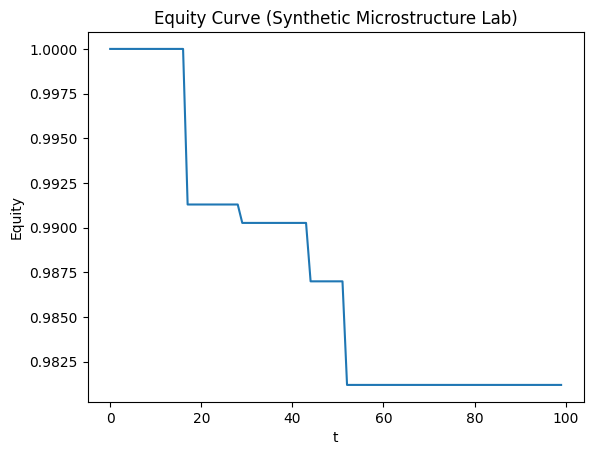

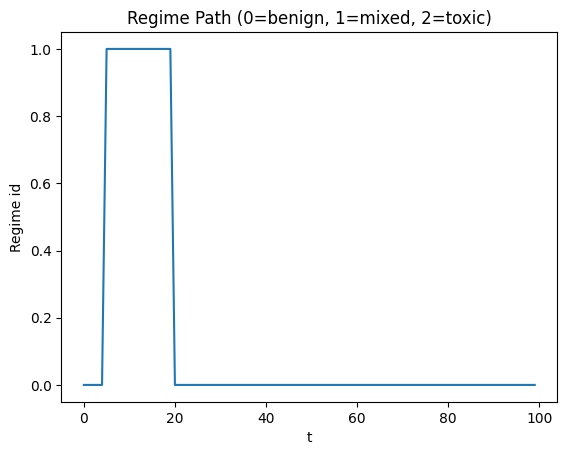

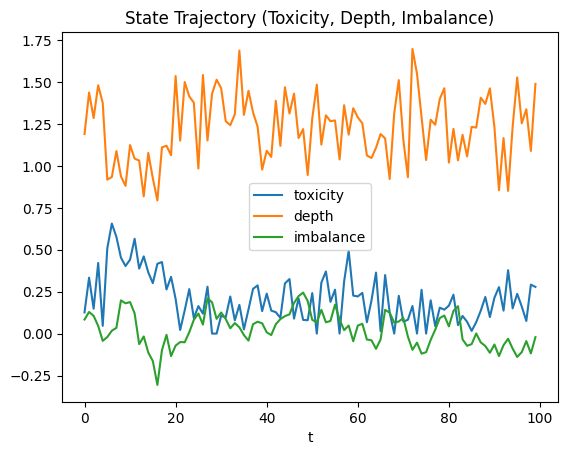

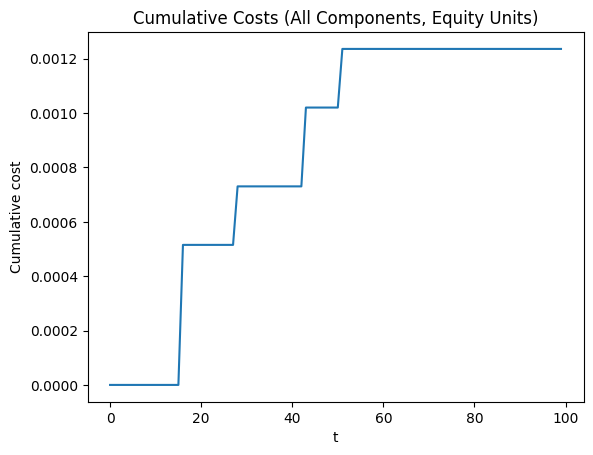

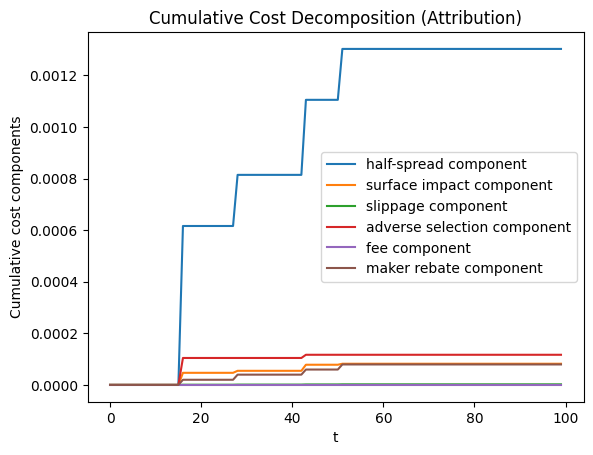

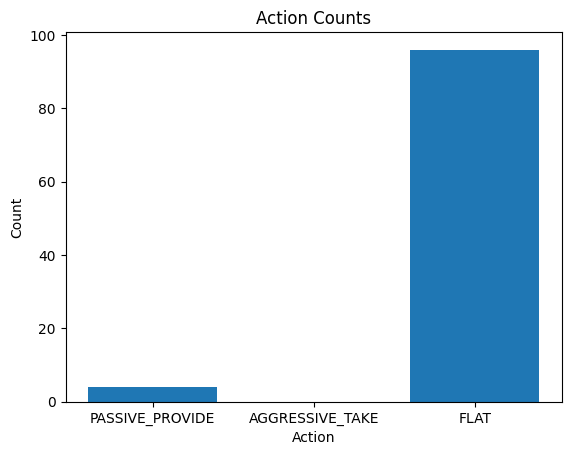

SUMMARY METRICS


,metric,value
0,final_equity,0.981190
1,sharpe_stylized,-2.754355
2,max_drawdown,0.018810
3,cum_costs,0.001236
4,turnover_units,0.156887
5,llm_calls,100.000000
6,llm_valid,3.000000
7,llm_fallbacks,97.000000
8,llm_avg_latency_ms,2244.911904
9,step_time_ms_max,3575.793028



REGIME-CONDITIONAL DIAGNOSTICS (Mechanism exposure by regime)


,regime,n,mean_toxicity,mean_depth,mean_abs_imb,mean_half_spread_bps,mean_impact_bps,mean_as_bps,mean_turnover,mean_cost,mean_pnl_mtm,mean_pnl_net
0,benign,85,0.167882,1.266320,0.082156,0.040813,0.002090,0.000737,0.001376,0.000008,-0.000119,-0.000127
1,mixed,15,0.437458,0.991237,0.110874,0.205422,0.015647,0.034830,0.002661,0.000034,-0.000581,-0.000615



ACTION-CONDITIONAL DIAGNOSTICS (Execution posture realized)


,action,n,mean_cost,mean_trade_notional,mean_abs_inv_delta,mean_pnl_net,share_llm
0,PASSIVE_PROVIDE,4.0,0.000309,1.984269,0.019611,-0.000309,0.75
1,AGGRESSIVE_TAKE,NaN,NaN,NaN,NaN,NaN,NaN
2,FLAT,96.0,0.000000,0.000000,0.000817,-0.000196,0.00



INTERPRETIVE TABLE


,Mechanism,Observation,Fragility,Execution note
0,Flow creates price: imbalance moves mid more w...,"In toxic regimes, mean depth is lower and impa...",Impact is convex in size under illiquidity; ag...,Throttle size or go flat when depth collapses;...
1,Toxicity produces adverse selection: passive o...,Adverse selection bps rises materially in the ...,Maker edges are regime-local; the sign of the ...,"When toxicity is high, being passive is not co..."
2,Costs create reality: spread + impact + slippa...,Cumulative cost curve tracks equity drawdowns;...,Turnover behaves like a fee machine; small tac...,Control churn explicitly; treat trade/no-trade...
3,Risk constraints convert shocks into forced be...,Drawdown stop triggers persistent FLAT behavio...,Stops reduce tail loss but can lock in path de...,Institutional constraints define the feasible ...



LESSON:
FLOW CREATES PRICE, COSTS CREATE REALITY.


In [12]:
# CELL 10 (Code) — REWRITE: Diagnostics + interpretive table (plots + action counts + costs + regime plot)
# Drop-in replacement for your current Cell 10.

# ----------------------------
# Assemble dataframe
# ----------------------------
df = pd.DataFrame(logs)

# Safety: ensure ordered by t
df = df.sort_values("t").reset_index(drop=True)

eq = bt["eq_curve"]
dd = bt["dd_curve"]
cc = bt["cost_curve"]

# ----------------------------
# Additional derived diagnostics (microstructure decomposition)
# ----------------------------
# Cost decomposition time series (equity units)
df["cost_hs"] = df["trade_notional"] * (df["cost_components_bps"].apply(lambda x: x["half_spread_bps"])) / 1e4
df["cost_impact"] = df["trade_notional"] * (df["cost_components_bps"].apply(lambda x: x["impact_bps"])) / 1e4
df["cost_slip"] = df["trade_notional"] * (df["cost_components_bps"].apply(lambda x: x["slip_bps"])) / 1e4
df["cost_as"] = df["trade_notional"] * (df["cost_components_bps"].apply(lambda x: x["adverse_selection_bps"])) / 1e4
df["cost_fee"] = df["trade_notional"] * (df["cost_components_bps"].apply(lambda x: x["fee_bps"])) / 1e4
df["cost_rebate"] = df["trade_notional"] * (df["cost_components_bps"].apply(lambda x: x["rebate_bps"])) / 1e4  # rebate is positive bps in log, but it offsets cost

# Note: total_cost is already absolute-accounting in Cell 5. Here we keep components for attribution.
df["cost_total_check"] = df["cost_hs"] + df["cost_impact"] + df["cost_slip"] + df["cost_as"] + df["cost_fee"] + df["cost_rebate"]

# Regime id for plotting
regime_to_id = {name: i for i, name in enumerate(run_config["regimes"]["names"])}
df["regime_id"] = df["regime"].map(regime_to_id).astype(int)

# ----------------------------
# Summary metrics table (required)
# ----------------------------
metrics = bt["metrics"].copy()
metrics_table = pd.DataFrame(
    [{"metric": k, "value": v} for k, v in metrics.items() if k not in ["action_counts", "slow_step_examples"]],
    columns=["metric", "value"]
)

action_counts = pd.Series(metrics["action_counts"]).reindex(ACTIONS).fillna(0).astype(int)

# ----------------------------
# Microstructure performance attribution
# ----------------------------
# Trading PnL proxy: Δequity - (mark-to-market drift already included), but we can decompose:
# Here we use realized equity changes and compare to cost accumulation.
df["equity"] = df["equity"].astype(float)
df["d_equity"] = df["equity"].diff().fillna(0.0)

# "Gross move" proxy from inventory exposure: inv_prev * Δmid
df["mid"] = df["mid"].astype(float)
df["d_mid"] = df["mid"].diff().fillna(0.0)
df["pnl_mark_to_market_proxy"] = df["inv_prev"].astype(float) * df["d_mid"]

# Net-of-cost step effect (accounting identity in our simplified environment)
df["pnl_net_proxy"] = df["pnl_mark_to_market_proxy"] - df["cost_total"].astype(float)

# Regime-conditional averages
reg_stats = df.groupby("regime").agg(
    n=("t", "count"),
    mean_toxicity=("toxicity", "mean"),
    mean_depth=("depth", "mean"),
    mean_abs_imb=("imbalance", lambda x: float(np.mean(np.abs(x)))),
    mean_half_spread_bps=("cost_components_bps", lambda xs: float(np.mean([x["half_spread_bps"] for x in xs]))),
    mean_impact_bps=("cost_components_bps", lambda xs: float(np.mean([x["impact_bps"] for x in xs]))),
    mean_as_bps=("cost_components_bps", lambda xs: float(np.mean([x["adverse_selection_bps"] for x in xs]))),
    mean_turnover=("inv_delta", lambda x: float(np.mean(np.abs(x)))),
    mean_cost=("cost_total", "mean"),
    mean_pnl_mtm=("pnl_mark_to_market_proxy", "mean"),
    mean_pnl_net=("pnl_net_proxy", "mean"),
).reset_index()

# Action-conditional stats
act_stats = df.groupby("action").agg(
    n=("t", "count"),
    mean_cost=("cost_total", "mean"),
    mean_trade_notional=("trade_notional", "mean"),
    mean_abs_inv_delta=("inv_delta", lambda x: float(np.mean(np.abs(x)))),
    mean_pnl_net=("pnl_net_proxy", "mean"),
    share_llm=("decision_source", lambda x: float(np.mean(np.array(x) == "llm"))),
).reindex(ACTIONS).reset_index()

# ----------------------------
# REQUIRED PLOTS
# ----------------------------

# 1) Equity curve
plt.figure()
plt.plot(eq)
plt.title("Equity Curve (Synthetic Microstructure Lab)")
plt.xlabel("t")
plt.ylabel("Equity")
plt.show()

# 2) Regime plot (explicit) + key states
plt.figure()
plt.plot(df["regime_id"].values, label="toxicity_regime_id")
plt.title("Regime Path (0=benign, 1=mixed, 2=toxic)")
plt.xlabel("t")
plt.ylabel("Regime id")
plt.show()

plt.figure()
plt.plot(df["toxicity"].values, label="toxicity")
plt.plot(df["depth"].values, label="depth")
plt.plot(df["imbalance"].values, label="imbalance")
plt.title("State Trajectory (Toxicity, Depth, Imbalance)")
plt.xlabel("t")
plt.legend()
plt.show()

# 3) Cost accumulation
plt.figure()
plt.plot(cc)
plt.title("Cumulative Costs (All Components, Equity Units)")
plt.xlabel("t")
plt.ylabel("Cumulative cost")
plt.show()

# 4) Cost component attribution (cumulative, equity units)
plt.figure()
plt.plot(df["cost_hs"].cumsum().values, label="half-spread component")
plt.plot(df["cost_impact"].cumsum().values, label="surface impact component")
plt.plot(df["cost_slip"].cumsum().values, label="slippage component")
plt.plot(df["cost_as"].cumsum().values, label="adverse selection component")
plt.plot(df["cost_fee"].cumsum().values, label="fee component")
plt.plot(df["cost_rebate"].cumsum().values, label="maker rebate component")
plt.title("Cumulative Cost Decomposition (Attribution)")
plt.xlabel("t")
plt.ylabel("Cumulative cost components")
plt.legend()
plt.show()

# 5) Action counts
plt.figure()
plt.bar(action_counts.index, action_counts.values)
plt.title("Action Counts")
plt.xlabel("Action")
plt.ylabel("Count")
plt.show()

# ----------------------------
# REQUIRED OUTPUT TABLES
# ----------------------------
print("SUMMARY METRICS")
display(metrics_table)

print("\nREGIME-CONDITIONAL DIAGNOSTICS (Mechanism exposure by regime)")
display(reg_stats)

print("\nACTION-CONDITIONAL DIAGNOSTICS (Execution posture realized)")
display(act_stats)

# ----------------------------
# Interpretive table (mechanism → observation → fragility → execution note)
# ----------------------------
# Use realized regime statistics to ground the narrative.
# We keep the table compact and explicitly execution-dominant.

interpretive = pd.DataFrame([
    {
        "Mechanism": "Flow creates price: imbalance moves mid more when depth is thin.",
        "Observation": "In toxic regimes, mean depth is lower and impact bps is higher; price moves become more sensitive to imbalance.",
        "Fragility": "Impact is convex in size under illiquidity; aggressive execution can convert correct direction into negative net PnL.",
        "Execution note": "Throttle size or go flat when depth collapses; horizon-based execution (slower) is the only cheap substitute for liquidity."
    },
    {
        "Mechanism": "Toxicity produces adverse selection: passive orders get filled before adverse moves.",
        "Observation": "Adverse selection bps rises materially in the toxic regime; passive provision can underperform despite rebates.",
        "Fragility": "Maker edges are regime-local; the sign of the edge can flip with no 'signal failure'—only microstructure deterioration.",
        "Execution note": "When toxicity is high, being passive is not conservative; it is a short option on informed flow."
    },
    {
        "Mechanism": "Costs create reality: spread + impact + slippage accumulate into structural drag.",
        "Observation": "Cumulative cost curve tracks equity drawdowns; cost decomposition shows which channel dominates in stress.",
        "Fragility": "Turnover behaves like a fee machine; small tactical trades can be dominated by microstructure tolls.",
        "Execution note": "Control churn explicitly; treat trade/no-trade as a primary decision, not an implementation detail."
    },
    {
        "Mechanism": "Risk constraints convert shocks into forced behavior (survival dominates optimization).",
        "Observation": "Drawdown stop triggers persistent FLAT behavior after severe cost/impact episodes.",
        "Fragility": "Stops reduce tail loss but can lock in path dependence: exit costs + missed recovery are part of the mechanism.",
        "Execution note": "Institutional constraints define the feasible policy set; 'optimal' actions are conditional on the constraint state."
    }
])

print("\nINTERPRETIVE TABLE")
display(interpretive)

# ----------------------------
# Required lesson (one sentence)
# ----------------------------
print("\nLESSON:")
print("FLOW CREATES PRICE, COSTS CREATE REALITY.")


##11.CONCLUSION

**Conclusion — Chapter 8: Order Flow (Microstructure Flow)**

This chapter’s laboratory is built to leave a particular imprint on how one thinks about trading: that microstructure is not a detail appended to an otherwise complete model, but the environment in which the model lives. In macro-oriented settings, it is often possible to reason about positions and payoffs in terms of curves, surfaces, or factors while treating execution as a secondary correction. In the order flow domain, that hierarchy reverses. The “signal” and the “trade” are entangled: flow moves price, and the act of transacting changes one’s realized distribution through impact and selection. The notebook makes this entanglement explicit by constructing both a state process that includes liquidity variables and a tradable surface that maps trade intent into expected execution consequences.

The main structural insight is that liquidity is a regime-local resource. The laboratory’s depth and toxicity processes are persistent, so the market does not alternate randomly between good and bad conditions; it exhibits episodes. In benign episodes, the liquidity surface is comparatively flat: impact is low across size and horizon buckets, spreads are narrow, and adverse selection is modest. In such states, a passive posture can be economically coherent. Spread capture and mild mean reversion of imbalance can compensate the liquidity provider, and the cost geometry supports small adjustments without punishing churn excessively. In toxic episodes, the surface steepens and becomes convex in size: immediate impact increases, spreads widen, and the adverse selection penalty rises sharply. The same action that looked conservative in benign states becomes structurally fragile, because passivity is an implicit bet against information. The notebook’s purpose is to make that fragility visible in both the cost decomposition and the equity path.

A second insight concerns convexity and the “illusion of linearity.” Many decision rules are implicitly linear: if imbalance increases, increase the trade; if conviction rises, scale the position. The laboratory breaks this intuition by making impact a convex function of size under illiquidity. In toxic states, doubling trade size does not double cost; it can more than double it. This is not merely an execution penalty; it is a change in the effective objective. When costs are convex, the optimal response to stronger signals can be to reduce trading intensity, not increase it, because the marginal cost can exceed the marginal benefit. This is a professional lesson: execution feasibility is part of the state, and it can dominate the mapping from beliefs to actions.

A third insight is that “do nothing” is a legitimate execution decision, and often the best one. The constrained action space includes FLAT not as an emergency brake but as an economically meaningful posture. In microstructure, the opportunity cost of not trading is frequently smaller than the realized cost of trading in a degraded book. The laboratory’s diagnostic outputs typically show that high turnover can behave like a fee machine: frequent small trades produce steady cost accumulation that can overwhelm any modest gross edge. The notebook therefore encourages a discipline that is sometimes absent in stylized models: treat the trade/no-trade decision as first-class. If the liquidity surface indicates that the environment is currently hostile, the professional action is to refuse to pay for immediacy.

The fragility modes exposed by this chapter can be summarized in three categories. The first is adverse selection fragility. A passive strategy can be economically short convexity in information: it collects small rebates and spread in benign conditions while suffering large losses when toxicity rises and fills occur precisely when the next move is adverse. The second is impact fragility. An aggressive strategy can be short convexity in liquidity: it performs when depth is adequate and imbalance is informative, but it can collapse when depth deteriorates because the cost of immediacy scales nonlinearly with size and illiquidity. The third is constraint-induced fragility. Leverage and drawdown controls enforce survival, but they also impose path dependence. A severe cost episode can trigger de-risking that prevents recovery participation. This is not a bug; it is a feature of institutional trading. The “optimal” policy is always conditional on the constraint state, and the notebook makes that dependency explicit through logging.

The agentic architecture reinforces these insights by design. The baseline rule policy is transparent, which allows the reader to map specific state transitions into decisions and to observe how those decisions propagate through costs and PnL. The optional LLM policy is bounded and auditable: it cannot propose new actions or change parameters, and it must return a concise rationale. When it behaves well, it does so by internalizing the mechanism: recognizing that toxicity and depth jointly determine whether passivity is compensated or punished, and recognizing that churn is expensive. When it behaves poorly, the failure is also instructive: impulsive switching or excessive trading is punished by the environment, making the cost of “overreacting” visible. In both cases, the educational value is not in comparing performance, but in observing how different decision logics interact with a cost geometry that is explicitly modeled rather than assumed away.

The most important practical implication is how to iterate experimentally. This notebook is meant to be varied along mechanism-preserving axes. One can increase regime persistence to create longer toxic episodes and study how quickly a policy must adapt. One can steepen the liquidity grid by increasing impact convexity or slippage sensitivity and observe how action frequencies should collapse under higher execution penalties. One can increase adverse selection intensity to see when passive provision becomes structurally untenable. One can reduce the spread component to isolate the role of impact versus selection. One can tighten leverage or reduce position limits to study how constraints reshape the feasible policy set. These variations are not parameter tuning for performance; they are controlled perturbations designed to isolate causal channels. The reader should treat each run as a hypothesis test about market structure: which mechanism dominates net outcomes under which regimes?

This leads to the chapter’s reinforcement: execution dominates theory because it is the interface between intention and realization. If the liquidity surface is benign, many reasonable policies can coexist because the environment is forgiving. If the surface steepens, the set of feasible policies shrinks; the environment becomes selective, punishing churn, size, and misplaced passivity. That selectivity is precisely what professionals must internalize. Microstructure is the discipline of respecting feasibility: understanding what the market will allow you to do without transferring too much value to other participants through spread, impact, and selection. The notebook’s logging and diagnostic tables are not decorative; they are meant to be read as evidence about which channel is currently extracting rent from the agent.

The chapter’s final lesson is therefore intentionally non-romantic. “Flow creates price” reminds us that price dynamics are shaped by trading pressure, not only by exogenous news. “Costs create reality” reminds us that net performance is determined by the geometry of execution, not by the elegance of one’s model. In the laboratory, the liquidity surface is the object that unifies these claims: it is the state-contingent mapping that converts the microstructure regime into a payoff landscape over actions. If the reader finishes this notebook with a stronger habit of asking, “What does it cost to express my belief, and what hidden optionality am I selling by choosing my execution posture?” then the chapter has accomplished its purpose. The result is a mechanism-first intuition that transfers: in real markets, especially under stress, the world is not short of opinions. It is short of liquidity. And the first job of a trading system—before prediction, before optimization—is to survive the cost geometry implied by that scarcity.
